In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# importing file

train=pd.read_csv('train.csv')

In [3]:
#check

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# nr rows

train.index

RangeIndex(start=0, stop=1460, step=1)

In [5]:
#columns

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#nr columns

train.columns.value_counts()

GarageType      1
BsmtHalfBath    1
MasVnrArea      1
GarageQual      1
LotConfig       1
               ..
3SsnPorch       1
Condition1      1
BsmtFinType1    1
Heating         1
LotArea         1
Length: 81, dtype: int64

In [7]:
#check nulls

null_columns=train.isnull().sum()
null_columns.sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
#drop nulls

drop_cols = list(null_columns[null_columns > 1000].index)
train = train.drop(drop_cols, axis=1)

In [9]:
#confirm

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [10]:
#delete columns not relevant for analysis

notrelevant=['MSSubClass', 'MSZoning', 'LotFrontage','LotConfig','Condition1','Condition2', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BldgType', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2', 'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF','Heating', 'HeatingQC','SaleType','CentralAir','BsmtFullBath', 'BsmtHalfBath','Electrical','LowQualFinSF','Functional','FireplaceQu','GarageType','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']

In [11]:
train = train.drop(notrelevant, axis=1)
train.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,8,0,2003.0,548,0,0,2,2008,Normal,208500
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,6,1,1976.0,460,0,0,5,2007,Normal,181500
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,6,1,2001.0,608,0,0,9,2008,Normal,223500
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,7,1,1998.0,642,0,0,2,2006,Abnorml,140000
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,9,1,2000.0,836,0,0,12,2008,Normal,250000


In [12]:
train.columns

Index(['Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond',
       'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:
#copy

house=train.copy()

house.dtypes

Id                 int64
LotArea            int64
Street            object
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
ExterCond         object
Foundation        object
BsmtCond          object
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageArea         int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SaleCondition     object
SalePrice          int64
dtype: object

In [14]:
#new colums time

house=house.assign(time_sold_from_contruction = house['YrSold']-house['YearBuilt'])

house=house.assign(time_sold_from_renovation = house['YrSold']-house['YearRemodAdd'])

house.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,2003.0,548,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,1976.0,460,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,2001.0,608,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,1998.0,642,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,2000.0,836,0,0,12,2008,Normal,250000,8,8


In [15]:
#putting number of bathrooms all together

house=house.assign(total_bathrooms_above_gl = house['FullBath']+house['HalfBath'])

house.columns

Index(['Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond',
       'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice', 'time_sold_from_contruction',
       'time_sold_from_renovation', 'total_bathrooms_above_gl'],
      dtype='object')

In [16]:
#drop remaining bathrooms

bathdrop=['FullBath', 'HalfBath']
house = house.drop(bathdrop, axis=1)

In [17]:
house.dtypes

Id                              int64
LotArea                         int64
Street                         object
Neighborhood                   object
HouseStyle                     object
OverallQual                     int64
OverallCond                     int64
YearBuilt                       int64
YearRemodAdd                    int64
RoofStyle                      object
ExterCond                      object
Foundation                     object
BsmtCond                       object
TotalBsmtSF                     int64
1stFlrSF                        int64
2ndFlrSF                        int64
GrLivArea                       int64
BedroomAbvGr                    int64
KitchenAbvGr                    int64
KitchenQual                    object
TotRmsAbvGrd                    int64
Fireplaces                      int64
GarageYrBlt                   float64
GarageArea                      int64
PoolArea                        int64
MiscVal                         int64
MoSold      

In [18]:
#check correlations,first overview to compare

house.corr()['SalePrice']


Id                           -0.021917
LotArea                       0.263843
OverallQual                   0.790982
OverallCond                  -0.077856
YearBuilt                     0.522897
YearRemodAdd                  0.507101
TotalBsmtSF                   0.613581
1stFlrSF                      0.605852
2ndFlrSF                      0.319334
GrLivArea                     0.708624
BedroomAbvGr                  0.168213
KitchenAbvGr                 -0.135907
TotRmsAbvGrd                  0.533723
Fireplaces                    0.466929
GarageYrBlt                   0.486362
GarageArea                    0.623431
PoolArea                      0.092404
MiscVal                      -0.021190
MoSold                        0.046432
YrSold                       -0.028923
SalePrice                     1.000000
time_sold_from_contruction   -0.523350
time_sold_from_renovation    -0.509079
total_bathrooms_above_gl      0.568267
Name: SalePrice, dtype: float64

In [19]:
#What makes sense to analyse?
#OverallQual
#TotalBsmtSF
#GrLivArea  
#TotRmsAbvGrd 
#GarageArea 
#time_sold_from_contruction 
#time_sold_from_renovation
#total_bathrooms_above_gl 

In [20]:
#check price mean as reference

meanp=house['SalePrice'].mean()
meanp

180921.19589041095

In [21]:
#grouping by neighbourhood and price to check the most expensive neighborhood

hood = house.groupby(['Neighborhood'], as_index = False).agg({ 'SalePrice': 'mean'})

hood=hood.sort_values(by='SalePrice', ascending = False)

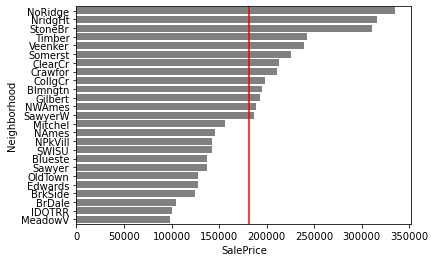

In [22]:
ax = sns.barplot(data=hood, 
            x="SalePrice",
            y="Neighborhood",
            color='grey');
#ax.axhline(hood.loc[hood["week_id"] == pd.to_datetime("2017-11-12"), "revenue"].values[0], color="r");

ax.axvline (meanp, color="red")

In [23]:
#check for outliers to remove neighborhood influence

descriptive=hood.describe().transpose()

descriptive

,count,mean,std,min,25%,50%,75%,max
SalePrice,25.0,183964.8533,66725.196972,98576.470588,136793.135135,186555.79661,212565.428571,335295.317073


In [24]:
#outliers neighborhood

descriptive['IQR'] = descriptive['75%'] - descriptive['25%']
print(descriptive['IQR'])

outlier25=descriptive['25%']-(1.5*descriptive['IQR'])

outlier75=descriptive['75%']+(1.5*descriptive['IQR'])

print('outlier25', outlier25)
print('outlier75', outlier75)

SalePrice    75772.293436
Name: IQR, dtype: float64
outlier25 SalePrice    23134.694981
dtype: float64
outlier75 SalePrice    326223.868726
dtype: float64


In [25]:
## **Analysis 1**: taking off the very expensive and cheap outliers looking at neighborhoods

In [26]:
#ATTENTION. break into different analysis

#first the no outliers analysis

outhood=house.copy()

outhood.drop(outhood[(outhood['SalePrice'] <= 23134.694981) | (outhood['SalePrice'] >= 326223.868726)].index, inplace=True)

outhood.corr()['SalePrice']


Id                           -0.024560
LotArea                       0.249283
OverallQual                   0.781060
OverallCond                  -0.042183
YearBuilt                     0.564631
YearRemodAdd                  0.541536
TotalBsmtSF                   0.543207
1stFlrSF                      0.524518
2ndFlrSF                      0.302815
GrLivArea                     0.653331
BedroomAbvGr                  0.197254
KitchenAbvGr                 -0.147242
TotRmsAbvGrd                  0.469249
Fireplaces                    0.451581
GarageYrBlt                   0.507852
GarageArea                    0.602064
PoolArea                      0.052033
MiscVal                      -0.011090
MoSold                        0.078957
YrSold                       -0.045282
SalePrice                     1.000000
time_sold_from_contruction   -0.565580
time_sold_from_renovation    -0.544503
total_bathrooms_above_gl      0.576009
Name: SalePrice, dtype: float64

In [27]:
#check for correlations between years on this cluster

outhood=sm.add_constant(outhood)
y1=outhood["SalePrice"]
X1=outhood[["const", "time_sold_from_contruction","time_sold_from_renovation"]]

reg1=sm.OLS(y1, X1).fit()

reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     444.1
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.00e-149
Time:                        10:35:50   Log-Likelihood:                -16823.
No. Observations:                1387   AIC:                         3.365e+04
Df Residuals:                    1384   BIC:                         3.367e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.178e+05   2039.968    106.773      0.000    2.14e+05    2.22e+05
time_sold_from_contruction  -719.6140     49.129    -14.648      0.000    -815.989    -623.239
time_sold_from_renovation   -907.3721     71.425    -12.704      0.000   -1047.486    -767.258
==============================================================================
Omnibus:                      121.674   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.153
Skew:                           0.743   Prob(JB):                     7.49e-35
Kurtosis:                       3.717   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#check for regression time sold from construction
outhood2=outhood.copy()

outhood2 = sm.add_constant(outhood2)
y2 = outhood2["SalePrice"]
X2 = outhood2[["const", "time_sold_from_contruction"]]

reg2 = sm.OLS(y2, X2).fit()

reg2.summary()

#even smaller R


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     651.4
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          4.40e-118
Time:                        10:50:18   Log-Likelihood:                -16900.
No. Observations:                1387   AIC:                         3.380e+04
Df Residuals:                    1385   BIC:                         3.381e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.098e+05   2050.031    102.354      0.000    2.06e+05    2.14e+05
time_sold_from_contruction -1080.5528     42.337    -25.523      0.000   -1163.604    -997.501
==============================================================================
Omnibus:                      175.671   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.819
Skew:                           0.892   Prob(JB):                     1.90e-58
Kurtosis:                       4.191   Cond. No.                         78.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

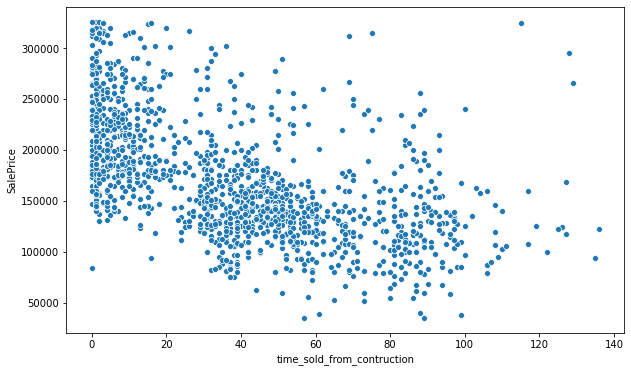

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood2,
                x="time_sold_from_contruction",
                y="SalePrice",
                ax=ax);

In [47]:
##check for regression time sold from year built

outhood3=outhood.copy()

outhood3 = sm.add_constant(outhood3)
y3 = outhood3["SalePrice"]
X3 = outhood3[["const", "YearBuilt"]]

reg3 = sm.OLS(y3, X3).fit()

reg3.summary()

#no strong connection either, but we can observe a trend

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     648.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.31e-117
Time:                        10:52:42   Log-Likelihood:                -16901.
No. Observations:                1387   AIC:                         3.381e+04
Df Residuals:                    1385   BIC:                         3.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.96e+06   8.36e+04    -23.438      0.000   -2.12e+06    -1.8e+06
YearBuilt   1080.7460     42.449     25.460      0.000     997.474    1164.018
==============================================================================
Omnibus:                      175.936   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.909
Skew:                           0.894   Prob(JB):                     1.81e-58
Kurtosis:                       4.186   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

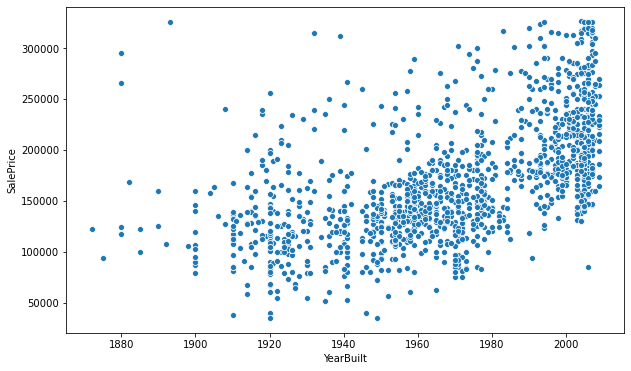

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood3,
                x="YearBuilt",
                y="SalePrice",
                ax=ax);

#no strong connection but a trend is visible

In [68]:
#check for regression area of lot and area above ground

outhood4=outhood.copy()

outhood4 = sm.add_constant(outhood4)
y4 = outhood4["SalePrice"]
X4 = outhood4[["const","LotArea","GrLivArea"]]

reg4 = sm.OLS(y4, X4).fit()

reg4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.32e-169
Time:                        11:38:26   Log-Likelihood:                -16781.
No. Observations:                1387   AIC:                         3.357e+04
Df Residuals:                    1385   BIC:                         3.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.318e+04   3785.041     14.051      0.000    4.58e+04    6.06e+04
GrLivArea     78.7745      2.453     32.116      0.000      73.963      83.586
==============================================================================
Omnibus:                      130.948   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.156
Skew:                          -0.195   Prob(JB):                    7.05e-167
Kurtosis:                       6.618   Cond. No.                     5.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#checking if other areas improve the model. adding basement area

outhood5=outhood.copy()

outhood5 = sm.add_constant(outhood5)
y5 = outhood5["SalePrice"]
X5 = outhood5[["const","LotArea","GrLivArea","TotalBsmtSF"]]

reg5 = sm.OLS(y5, X5).fit()

reg5.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     579.7
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          2.72e-107
Time:                        11:39:25   Log-Likelihood:                -16925.
No. Observations:                1387   AIC:                         3.385e+04
Df Residuals:                    1385   BIC:                         3.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.045e+04   3502.727     25.823      0.000    8.36e+04    9.73e+04
TotalBsmtSF    76.7379      3.187     24.078      0.000      70.486      82.990
==============================================================================
Omnibus:                      109.885   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.002
Skew:                           0.092   Prob(JB):                    3.08e-126
Kurtosis:                       6.157   Cond. No.                     2.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
#checking if other areas improve the model. adding garage area

outhood6=outhood.copy()

outhood6 = sm.add_constant(outhood6)
y6 = outhood6["SalePrice"]
X6 = outhood6[["const","LotArea","GrLivArea","GarageArea"]]

reg6 = sm.OLS(y6, X6).fit()

reg6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     595.5
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.98e-248
Time:                        11:43:03   Log-Likelihood:                -16592.
No. Observations:                1387   AIC:                         3.319e+04
Df Residuals:                    1383   BIC:                         3.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.953e+04   3499.278      8.439      0.000    2.27e+04    3.64e+04
LotArea        0.3396      0.127      2.666      0.008       0.090       0.589
GrLivArea     57.5578      2.404     23.946      0.000      52.843      62.273
GarageArea   112.4888      5.524     20.363      0.000     101.652     123.325
==============================================================================
Omnibus:                      356.999   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4141.261
Skew:                          -0.853   Prob(JB):                         0.00
Kurtosis:                      11.291   Cond. No.                     4.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# checking the overall condition score influence

outhood6=outhood.copy()

outhood6 = sm.add_constant(outhood6)
y6 = outhood6["SalePrice"]
X6 = outhood6[["const", "OverallCond"]]

reg6 = sm.OLS(y6, X6).fit()

reg6.summary()

#not highly significant, drop from regression since it decreases the quality of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.469
Date:                Fri, 11 Sep 2020   Prob (F-statistic):              0.116
Time:                        11:20:10   Log-Likelihood:                -17166.
No. Observations:                1387   AIC:                         3.434e+04
Df Residuals:                    1385   BIC:                         3.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.809e+05   7856.109     23.028      0.000    1.66e+05    1.96e+05
OverallCond -2163.7080   1377.052     -1.571      0.116   -4865.042     537.626
==============================================================================
Omnibus:                       71.921   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.563
Skew:                           0.598   Prob(JB):                     1.18e-18
Kurtosis:                       3.016   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# checking the overall quality score influence

outhood7=outhood.copy()

outhood7 = sm.add_constant(outhood7)
y7 = outhood7["SalePrice"]
X7 = outhood7[["const", "OverallQual"]]

reg7 = sm.OLS(y7, X7).fit()

reg7.summary()

#might be significant. adding it to potential model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2167.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.61e-285
Time:                        11:41:03   Log-Likelihood:                -16514.
No. Observations:                1387   AIC:                         3.303e+04
Df Residuals:                    1385   BIC:                         3.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.212e+04   4632.723     -9.093      0.000   -5.12e+04    -3.3e+04
OverallQual  3.536e+04    759.708     46.549      0.000    3.39e+04    3.69e+04
==============================================================================
Omnibus:                       23.316   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.166
Skew:                           0.146   Prob(JB):                     1.40e-08
Kurtosis:                       3.735   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# checking the overall quality score on the area model

outhood8=outhood.copy()

outhood8 = sm.add_constant(outhood8)
y8 = outhood8["SalePrice"]
X8 = outhood8[["const","OverallQual","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

reg8 = sm.OLS(y8, X8).fit()

reg8.summary()

#GOOD! acceptable model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     810.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:45:29   Log-Likelihood:                -16217.
No. Observations:                1387   AIC:                         3.245e+04
Df Residuals:                    1381   BIC:                         3.248e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.596e+04   3840.785    -14.571      0.000   -6.35e+04   -4.84e+04
OverallQual  2.262e+04    813.232     27.818      0.000     2.1e+04    2.42e+04
LotArea         0.6030      0.100      6.039      0.000       0.407       0.799
GrLivArea      29.4454      2.042     14.420      0.000      25.440      33.451
TotalBsmtSF    16.1125      2.307      6.983      0.000      11.586      20.639
GarageArea     52.6930      4.670     11.284      0.000      43.533      61.853
==============================================================================
Omnibus:                      846.712   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42517.551
Skew:                          -2.144   Prob(JB):                         0.00
Kurtosis:                      29.783   Cond. No.                     6.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#finally, also wanted to check the number of rooms influence. looking at rooms and bathrooms above ground level

outhood9=outhood.copy()

outhood9 = sm.add_constant(outhood9)
y9 = outhood9["SalePrice"]
X9 = outhood9[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

reg9 = sm.OLS(y9, X9).fit()

reg9.summary()

#BEST MODEL SO FAR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     604.0
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:51:11   Log-Likelihood:                -16194.
No. Observations:                1387   AIC:                         3.240e+04
Df Residuals:                    1379   BIC:                         3.245e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.396e+04   4682.086    -11.526      0.000   -6.31e+04   -4.48e+04
TotRmsAbvGrd               -45.9380    881.703     -0.052      0.958   -1775.562    1683.686
total_bathrooms_above_gl  1.002e+04   1472.815      6.804      0.000    7131.777    1.29e+04
OverallQual               2.083e+04    847.543     24.573      0.000    1.92e+04    2.25e+04
LotArea                      0.6455      0.099      6.548      0.000       0.452       0.839
GrLivArea                   19.7594      3.522      5.610      0.000      12.850      26.668
TotalBsmtSF                 20.9924      2.395      8.765      0.000      16.294      25.691
GarageArea                  49.9287      4.616     10.815      0.000      40.873      58.985
==============================================================================
Omnibus:                      787.164   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37622.576
Skew:                          -1.928   Prob(JB):                         0.00
Kurtosis:                      28.222   Cond. No.                     8.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#FINAL MODEL WITHOUT SALES PRICE OUTLIERS BY NEIGHBORHOOD:

"""outhood9=outhood.copy()

outhood9 = sm.add_constant(outhood9)
y9 = outhood9["SalePrice"]
X9 = outhood9[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

reg9 = sm.OLS(y9, X9).fit()

reg9.summary()
"""

In [ ]:

outhood6 = outhood6.assign(y_hat=lin_reg.predict(outhood6[["const", "x"]]))

In [ ]:
#last model close to acceptable R, potential! trying now without neighborhood outliers

house7=house.copy()
house7.drop(house7[(house7['SalePrice'] <= 23134.694981) | (house7['SalePrice'] >= 326223.868726)].index, inplace=True)


house7 = sm.add_constant(house7)
y7 = house7["SalePrice"]
X7 = house7[["const", "OverallQual"]]

reg7 = sm.OLS(y7, X7).fit()

reg7.summary()